In [1]:
#install python (and check the add to path option during installation), then install the ema_workbench python module.
#this can be done by executing the following command in the command prompt:
# pip install ema_workbench

#import necessary python libraries for the analysis
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import pickle

#import EMA workbench tools
from ema_workbench.em_framework import samplers, evaluators, util
from ema_workbench import (RealParameter, ScalarOutcome, Model, Constant)
from ema_workbench import (perform_experiments, ema_logging, save_results, 
                           load_results, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)


#import PRIM algorithm
from ema_workbench.analysis import prim

C:\Users\frac1\anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:21: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn(
C:\Users\frac1\anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Users\frac1\anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "


# 1. Specify uncertainties

Only local analysis values are used, so to make benefit transfer possible for the case-study of Quartier Alzette (Esch-sur-Alzette, Luxembourg)

In [2]:
raw_data = pd.read_csv("Data/Costs and benefits of photovoltaic-green roofs.csv")

In [3]:
# Selection of local analysis' data

local_items = raw_data[(((raw_data["Technology"] == "Green roof") | 
                         (raw_data["Technology"] == "Photovoltaic-green roof") ) &
                        (raw_data["Base case roof"] == "black roof") &
                        (raw_data["Climate"] == "Cfb") &
                        (raw_data["Continent"] == "Europe") &
                        (raw_data["Unusable monetary value"] != "x") &
                        ((raw_data["Item"] == "Urban heat island effect mitigation") |
                        (raw_data["Item"] == "Water runoff quality increase") |
                        (raw_data["Item"] == "Urban noise reduction") |
                        (raw_data["Item"] == "Biodiversity enhancement") |
                        (raw_data["Item"] == "Energy consumption reduction (heating and cooling)") |
                        (raw_data["Item"] == "Sound insulation") |
                        (raw_data["Item"] == "Aesthetics increase") |
                        (raw_data["Item"] == "Replacement and disposal of green roof") |
                        (raw_data["Item"] == "Installation of green roof (net)") |
                        (raw_data["Item"] == "Longevity increase") |
                        (raw_data["Item"] == "Fire risk reduction") |
                        (raw_data["Item"] == "Maintenance of green roof (net)") |
                        (raw_data["Item"] == "Air quality enhancement") |
                        (raw_data["Item"] == "CO2 emission reduction") |
                        (raw_data["Item"] == "Stormwater management") |
                        (raw_data["Item"] == "Air pollution from green roof production") |
                        (raw_data["Item"] == "CO2 emissions from green roof production") |
                        (raw_data["Item"] == "CO2 uptake") |
                        (raw_data["Item"] == "Electricity generation") |
                        (raw_data["Item"] == "Water runoff quality increase") |
                        (raw_data["Item"] == "Local area's aesthetics increase"))) |
                       (raw_data["Technology"] == "Photovoltaic panels") &
                       (raw_data["Climate"] == "Cfb") &
                       (raw_data["Continent"] == "Europe")]

local_items = local_items[["Item","Item type", "Actual year(s) at which the item is accounted", "Adjusted Monetary value [EU27 2020 €/m2]"]]

local_costs = local_items[ (local_items["Item type"]=="cost") ]
local_benefits = local_items[ (local_items["Item type"]=="benefit") ]
display(local_costs)
display(local_benefits)

,Item,Item type,Actual year(s) at which the item is accounted,Adjusted Monetary value [EU27 2020 €/m2]
396,Installation of green roof (net),cost,0,18.605990
403,Installation of green roof (net),cost,0,31.583495
404,Installation of green roof (net),cost,0,33.212560
405,Installation of green roof (net),cost,0,34.841625
413,Installation of green roof (net),cost,0,89.751634
414,Installation of green roof (net),cost,0,89.751634
417,Installation of green roof (net),cost,0,95.735077
418,Installation of green roof (net),cost,0,95.735077
427,Installation of green roof (net),cost,0,84.307442
428,Installation of green roof (net),cost,0,84.307442


,Item,Item type,Actual year(s) at which the item is accounted,Adjusted Monetary value [EU27 2020 €/m2]
32,Aesthetics increase,benefit,0,328.339910
50,Air quality enhancement,benefit,every year,0.012625
65,Air quality enhancement,benefit,every year,0.375703
67,Air quality enhancement,benefit,every year,0.499919
68,Air quality enhancement,benefit,every year,0.030853
110,Biodiversity enhancement,benefit,every year,0.154169
124,CO2 emission reduction,benefit,every year,0.020363
126,CO2 emission reduction,benefit,every year,0.030545
127,CO2 emission reduction,benefit,every year,0.082471
154,CO2 uptake,benefit,every year,0.003410


In [4]:
# Visualize the years at which the costs and benefits need to be accounted in the CBA Model
local_costs.groupby("Item")["Actual year(s) at which the item is accounted"].agg(lambda x:x.value_counts().index[0])

Item
Installation of PV panels                    0
Installation of green roof (net)             0
Maintenance of PV panels            every year
Maintenance of green roof (net)     every year
Name: Actual year(s) at which the item is accounted, dtype: object

In [5]:
local_benefits.groupby("Item")["Actual year(s) at which the item is accounted"].agg(lambda x:x.value_counts().index[0])

Item
Aesthetics increase                                                                                   0
Air quality enhancement                                                                      every year
Biodiversity enhancement                                                                     every year
CO2 emission reduction                                                                       every year
CO2 uptake                                                                                   every year
Electricity generation                                                                       every year
Energy consumption reduction (heating and cooling)                                           every year
Fire risk reduction                                                                          every year
Longevity increase                                    every year (see "longevity increase calculatio...
Sound insulation                                           

In [6]:
# determining the amount of datapoints within the range, so to gain insight into the representativeness of the using the range (i.e., max-min) for each 
# cost or benefit

def q1(Item):
    # just take unique values, since cases in which there is a double recording are not considered
    # otherwise, if double recordings were included they would distort the quartiles and the outliers.
    #NB: double recordings occur for a cost or benefit value that applies to multiple building scenarios,
    #    nevertheless, here such building scenarios are not considered.
    Item = pd.Series(Item.unique())
    return Item.quantile(0.25, interpolation="higher")

def q3(Item):
    # just take unique values, since cases in which there is a double recording are not considered
    # otherwise, if double recordings were included they would distort the quartiles and the outliers.
    #NB: double recordings occur for a cost or benefit value that applies to multiple building scenarios,
    #    nevertheless, here such building scenarios are not considered.
    Item = pd.Series(Item.unique())
    return Item.quantile(0.75, interpolation="higher")

def median(Item):
    # just take unique values, since cases in which there is a double recording are not considered
    # otherwise, if double recordings were included they would distort the quartiles and the outliers.
    #NB: double recordings occur for a cost or benefit value that applies to multiple building scenarios,
    #    nevertheless, here such building scenarios are not considered.
    Item = pd.Series(Item.unique())
    return Item.median()

def non_outlier_values(Item):
    # only when dataset has more than three items compute the quantiles and inter-quartile range
    # when there are just three values, these will already be the min, median, and max values.
    if len(Item) > 3:
        quartile_1 = q1(Item)
        quartile_3 = q3(Item)
        upper_limit = quartile_3 + 1.5 * (quartile_3 - quartile_1)
        lower_limit = quartile_1 - 1.5 * (quartile_3 - quartile_1)
        Item = pd.Series(Item.unique())
        non_outlier_values_list = Item[(Item <= upper_limit) & (Item >= lower_limit)]
    else:
        Item = pd.Series(Item.unique())
        non_outlier_values_list = Item
    
    return non_outlier_values_list

def minimum(Item):
    non_outlier_values_list = non_outlier_values(Item)
    return non_outlier_values_list.min()

def maximum(Item):
    non_outlier_values_list = non_outlier_values(Item)
    return non_outlier_values_list.max()

summary_costs = local_costs.groupby('Item')["Adjusted Monetary value [EU27 2020 €/m2]"].agg([minimum, median, maximum])

# Replace the spaces in the row indexes' names (i.e., the benefits' names) with an underscore, and delete parentheses,
# so to be able to use the benefit names as variables in the CBA Model
summary_costs.index = summary_costs.index.str.replace("(", "")
summary_costs.index = summary_costs.index.str.replace(")", "")
summary_costs.index = summary_costs.index.str.replace(" net", "")
summary_costs.index = summary_costs.index.str.replace(" ","_")

display(summary_costs)

# do it again for benefits
summary_benefits = local_benefits.groupby('Item').agg([minimum, median, maximum])

summary_benefits.columns = summary_benefits.columns.droplevel()
summary_benefits.index = summary_benefits.index.str.replace("(", "")
summary_benefits.index = summary_benefits.index.str.replace(")", "")
summary_benefits.index = summary_benefits.index.str.replace(" heating and cooling", "")
summary_benefits.index = summary_benefits.index.str.replace(" ","_")

display(summary_benefits)

C:\Users\frac1\AppData\Local\Temp/ipykernel_28656/183112711.py:56: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  summary_costs.index = summary_costs.index.str.replace("(", "")
C:\Users\frac1\AppData\Local\Temp/ipykernel_28656/183112711.py:57: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  summary_costs.index = summary_costs.index.str.replace(")", "")


,minimum,median,maximum
Item,,,
Installation_of_PV_panels,8.969562,14.828348,23.434589
Installation_of_green_roof,18.605990,87.029538,119.668846
Maintenance_of_PV_panels,0.179391,0.296567,0.468692
Maintenance_of_green_roof,0.037622,0.470845,1.085364


C:\Users\frac1\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)
C:\Users\frac1\AppData\Local\Temp/ipykernel_28656/183112711.py:67: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  summary_benefits.index = summary_benefits.index.str.replace("(", "")
C:\Users\frac1\AppData\Local\Temp/ipykernel_28656/183112711.py:68: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  summary_benefits.index = summary_benefits.index.str.re

,minimum,median,maximum
Item,,,
Aesthetics_increase,328.339910,328.339910,328.339910
Air_quality_enhancement,0.012625,0.203278,0.499919
Biodiversity_enhancement,0.154169,0.154169,0.154169
CO2_emission_reduction,0.020363,0.030545,0.082471
CO2_uptake,0.002848,0.003129,0.003410
Electricity_generation,2.459590,5.444692,5.485327
Energy_consumption_reduction,0.078595,0.391402,0.603092
Fire_risk_reduction,0.000000,0.000000,0.000000
Longevity_increase,0.828746,2.307143,5.734520


In [7]:
# Appropriate corrections

# due to the lower number of observations (n=1)
summary_benefits.loc["Aesthetics_increase", ["minimum", "median"]] = [0.00, (0.00 + 328.339910)/2]

# due to the desired method to calculate the quantile (excluding the median), 
# which differs from the one available in python at the moment (which always includes it).
summary_benefits.loc["Electricity_generation", "maximum"] = 7.905312691

summary_benefits

,minimum,median,maximum
Item,,,
Aesthetics_increase,0.000000,164.169955,328.339910
Air_quality_enhancement,0.012625,0.203278,0.499919
Biodiversity_enhancement,0.154169,0.154169,0.154169
CO2_emission_reduction,0.020363,0.030545,0.082471
CO2_uptake,0.002848,0.003129,0.003410
Electricity_generation,2.459590,5.444692,7.905313
Energy_consumption_reduction,0.078595,0.391402,0.603092
Fire_risk_reduction,0.000000,0.000000,0.000000
Longevity_increase,0.828746,2.307143,5.734520


In [8]:
# Do not consider fire risk reduction, urban heat island mitigation, since such recorded benefits are equal to zero 
# in the local analysis' case-studies
# Do not consider biodiversity enhancement here, as there is just one value, and it will be considered as a constant
# in the CBA model

summary_benefits.drop([summary_benefits.index[11], summary_benefits.index[7], summary_benefits.index[2]], inplace=True)
summary_benefits.iat[0,0] = 0
summary_benefits.insert(3, "perspective", 
                        ["non-private",
                         "non-private",
                         "non-private",
                         "non-private",
                         "private",
                         "private",
                         "private",
                         "non-private",
                         "non-private",
                         "non-private",])
display(summary_benefits)

,minimum,median,maximum,perspective
Item,,,,
Aesthetics_increase,0.000000,164.169955,328.339910,non-private
Air_quality_enhancement,0.012625,0.203278,0.499919,non-private
CO2_emission_reduction,0.020363,0.030545,0.082471,non-private
CO2_uptake,0.002848,0.003129,0.003410,non-private
Electricity_generation,2.459590,5.444692,7.905313,private
Energy_consumption_reduction,0.078595,0.391402,0.603092,private
Longevity_increase,0.828746,2.307143,5.734520,private
Sound_insulation,0.277959,0.299341,0.635087,non-private
Stormwater_management,0.096726,0.716178,2.679685,non-private


# 2. CBA Model

In [9]:
# define CBA model as a function

def cba(time_horizon = 40, r = 0.04,
       Aesthetics_increase = 0, Air_quality_enhancement= 0, Biodiversity_enhancement= 0, CO2_emission_reduction= 0, CO2_uptake= 0, 
        Energy_consumption_reduction= 0, Electricity_generation = 0, Longevity_increase= 0, 
        Sound_insulation= 0, Stormwater_management= 0, Water_runoff_quality_increase= 0,
        Installation_of_green_roof= 0, Maintenance_of_green_roof= 0, Installation_of_PV_panels = 0, Maintenance_of_PV_panels = 0):
    """This function defines the cost-benefit analysis model for photovoltaic-green roofs"""
    
    # initialize the net present value (i.e., the summation) and an auxiliary variable
    npv = 0
    aux = 0
    
    # perform the summation (i.e., sum the summation arguments)
    for t in range(0,time_horizon):
        
        #define the sum of all benefits, which are all yearly values
        benefits_sum = np.sum([Air_quality_enhancement, Biodiversity_enhancement, CO2_emission_reduction, CO2_uptake,
                               Energy_consumption_reduction, Longevity_increase, 
                               Sound_insulation, Stormwater_management, Water_runoff_quality_increase, Electricity_generation])
        #define the sum of all benefits execept that related to photovoltaic panels 
        benefits_sum_no_pvs = np.sum([Air_quality_enhancement, Biodiversity_enhancement, CO2_emission_reduction, CO2_uptake,
                               Energy_consumption_reduction, Longevity_increase, 
                               Sound_insulation, Stormwater_management, Water_runoff_quality_increase])
        
        if t == 0:         
            #compute the summation argument of year 0
            summation_argument = ( Aesthetics_increase - Installation_of_PV_panels - Installation_of_green_roof) / (1 + r)**t
            
        elif t == 19:
            #compute the summation argument of the operative year when PV panels need to be re-installed (i.e, year 20)
            summation_argument = (benefits_sum_no_pvs - Maintenance_of_green_roof - Installation_of_PV_panels) / (1 + r)**t
            
        elif (t == time_horizon-1):    
            #compute the summation argument of the last year of operative life
            summation_argument = (-Installation_of_PV_panels - Installation_of_green_roof) / (1 + r)**t   
        
        else:
            #compute the summation argument of each year of operative and active life, other than the ones mentioned above
            summation_argument = (benefits_sum - Maintenance_of_green_roof - Maintenance_of_PV_panels) / (1 + r)**t
            
        #sum the summation argument with the total, already summed, value of the previous iteration (i.e., the previous year)
        npv += summation_argument
        
    return npv, aux

## 2.1 CBA including all items

In [10]:
# specify the EMA workbench's wrapper around the CBA model function, so as to perform 
# exploratory modelling within it

###### instantiate the model ######
cba_model = Model('cba', function=cba)
cba_model.time_horizon = 40

######  specify uncertainties ######

uncertainties_list = []

#add benefit variables 
for benefit_name in summary_benefits.index:
    print(benefit_name)
    #get benefit's min value
    benefit_min = summary_benefits.loc[benefit_name,"minimum"]
    print(benefit_min)
    #get benefit's max value
    benefit_max = summary_benefits.loc[benefit_name,"maximum"]
    print(benefit_max)
    # add the benefit variable with its name, min, and max values in the uncertainties list
    uncertainties_list.append( RealParameter(benefit_name, benefit_min, benefit_max) )
    
#add cost variables 
for cost_name in summary_costs.index:
    print(cost_name)
    #get benefit's min value
    cost_min = summary_costs.loc[cost_name,"minimum"]
    print(cost_min)
    #get benefit's max value
    cost_max = summary_costs.loc[cost_name,"maximum"]
    print(cost_max)
    # add the cost variable with its name, min, and max values in the uncertainties list
    uncertainties_list.append( RealParameter(cost_name, cost_min, cost_max) )
    
# add social discount rate
uncertainties_list.append( RealParameter("r", 0.02, 0.0667) )

# set the uncertainties list just created as the EMA Workbench "uncertainties wrapper"
cba_model.uncertainties = uncertainties_list


#specify constants
cba_model.constants = [Constant('Biodiversity_enhancement', 0.154169)]
                   
                
#specify the outcome
cba_model.outcomes = [ScalarOutcome('npv')]
# cba_model.outcomes = [ScalarOutcome('npv')], ScalarOutcome("aux")]

Aesthetics_increase
0.0
328.33990954962
Air_quality_enhancement
0.0126252527
0.49991928035
CO2_emission_reduction
0.02036331081
0.08247140877
CO2_uptake
0.00284792404
0.00340997057
Electricity_generation
2.45958990521
7.905312691
Energy_consumption_reduction
0.07859483517
0.60309177822
Longevity_increase
0.82874589677
5.7345200037
Sound_insulation
0.27795919254
0.63508706179
Stormwater_management
0.09672572634
2.67968467917
Water_runoff_quality_increase
0.29323167564
0.32377664186
Installation_of_PV_panels
8.96956163515
23.4345889484
Installation_of_green_roof
18.60599022778
119.66884566468
Maintenance_of_PV_panels
0.1793912327
0.46869177897
Maintenance_of_green_roof
0.03762198238
1.0853644661


In [11]:
# generation of experiments (scenario-policy couples) including all costs and benefits

# generation of scenarios whose values will be sampled
n_scenarios = 100000

with SequentialEvaluator(cba_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(n_scenarios)

display(experiments)
display(outcomes)

[MainProcess/INFO] performing 100000 scenarios * 1 policies * 1 model(s) = 100000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] 20000 cases completed
[MainProcess/INFO] 30000 cases completed
[MainProcess/INFO] 40000 cases completed
[MainProcess/INFO] 50000 cases completed
[MainProcess/INFO] 60000 cases completed
[MainProcess/INFO] 70000 cases completed
[MainProcess/INFO] 80000 cases completed
[MainProcess/INFO] 90000 cases completed
[MainProcess/INFO] 100000 cases completed
[MainProcess/INFO] experiments finished


,Aesthetics_increase,Air_quality_enhancement,CO2_emission_reduction,CO2_uptake,Electricity_generation,Energy_consumption_reduction,Installation_of_PV_panels,Installation_of_green_roof,Longevity_increase,Maintenance_of_PV_panels,Maintenance_of_green_roof,Sound_insulation,Stormwater_management,Water_runoff_quality_increase,r,scenario,policy,model
0,142.904924,0.234111,0.064966,0.003147,4.197838,0.475430,12.067156,92.814606,1.796093,0.208553,0.517201,0.340165,0.932048,0.315043,0.021785,0,None,cba
1,48.220130,0.153114,0.037274,0.003323,7.101664,0.540424,9.974554,80.772345,5.262330,0.355060,0.434810,0.446812,0.378031,0.315587,0.054537,1,None,cba
2,234.886912,0.456158,0.045087,0.003388,7.455568,0.084810,20.364583,77.860565,3.554344,0.451803,0.088727,0.557987,0.681502,0.319141,0.023048,2,None,cba
3,135.771433,0.329476,0.060898,0.003048,2.505814,0.462067,17.504414,68.814210,2.895312,0.194004,0.473867,0.459203,1.255466,0.300690,0.062920,3,None,cba
4,220.252585,0.280847,0.059915,0.003112,5.875853,0.179059,17.940359,44.942758,1.358381,0.430034,0.594187,0.501197,1.292609,0.304214,0.058745,4,None,cba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,183.227309,0.322275,0.068300,0.002997,7.870665,0.435196,10.532079,53.289872,2.400862,0.350780,0.883966,0.540456,2.335807,0.311339,0.021950,99995,None,cba
99996,163.578584,0.281641,0.075925,0.003331,4.317893,0.534358,17.511915,101.722015,2.404979,0.331126,1.024292,0.458230,2.448424,0.310648,0.065499,99996,None,cba
99997,1.243935,0.208850,0.033553,0.003145,6.918755,0.299813,11.441326,28.523509,2.072846,0.299557,0.392455,0.569194,1.790029,0.293574,0.035500,99997,None,cba
99998,148.316254,0.068959,0.080989,0.003172,4.874074,0.247027,21.567064,33.340536,3.556500,0.223899,1.079785,0.399474,0.718492,0.305933,0.037045,99998,None,cba


{'npv': array([181.96184777, 156.20208285, 399.54156004, ..., 182.75264674,
        251.07434542, 209.43631981])}

In [12]:
# save the data generated, to directly load it in the future
experiments.to_csv("experiments.csv",index=False)

outcomes_file = open("outcomes.txt", "wb")
pickle.dump(outcomes, outcomes_file)
outcomes_file.close()

In [13]:
# load the saved experiments and outcomes
experiments = pd.read_csv("experiments.csv")

outcomes_file = open("outcomes.txt", "rb")
outcomes = pickle.load(outcomes_file)
outcomes_file.close()

## 2.2 CBA including only private items

In [14]:
summary_private_benefits = summary_benefits[summary_benefits["perspective"]=="private"]
summary_private_benefits

,minimum,median,maximum,perspective
Item,,,,
Electricity_generation,2.459590,5.444692,7.905313,private
Energy_consumption_reduction,0.078595,0.391402,0.603092,private
Longevity_increase,0.828746,2.307143,5.734520,private


In [15]:
# specify the EMA workbench's wrapper around the CBA model function, so as to perform 
# exploratory modelling within it

###### instantiate the model ######
cba_model = Model('cba', function=cba)
cba_model.time_horizon = 40

######  specify uncertainties ######
uncertainties_list = []

#add benefit variables 
for benefit_name in summary_private_benefits.index:
    
    #get benefit's min value
    benefit_min = summary_private_benefits.loc[benefit_name,"minimum"]
    
    #get benefit's max value
    benefit_max = summary_private_benefits.loc[benefit_name,"maximum"]
    
    # add the benefit variable with its name, min, and max values in the uncertainties list
    uncertainties_list.append( RealParameter(benefit_name, benefit_min, benefit_max) )
    
#add cost variables 
for cost_name in summary_costs.index:
    
    #get benefit's min value
    cost_min = summary_costs.loc[cost_name,"minimum"]
    
    #get benefit's max value
    cost_max = summary_costs.loc[cost_name,"maximum"]
    
    # add the cost variable with its name, min, and max values in the uncertainties list
    uncertainties_list.append( RealParameter(cost_name, cost_min, cost_max) )
    
# add private discount rate
uncertainties_list.append( RealParameter("r", 0.03, 0.09) )

# set the uncertainties list just created as the EMA Workbench "uncertainties wrapper"
cba_model.uncertainties = uncertainties_list
                        
######  specify the outcome ######
cba_model.outcomes = [ScalarOutcome('npv')]
# cba_model.outcomes = [ScalarOutcome('npv'), ScalarOutcome("aux")]

In [16]:
# generation of experiments (scenario-policy couples) including private items only

# generation of scenarios whose values will be sampled
n_scenarios = 100000

with SequentialEvaluator(cba_model) as evaluator:
    experiments_private, outcomes_private = evaluator.perform_experiments(n_scenarios)

display(experiments_private)
display(outcomes_private)

[MainProcess/INFO] performing 100000 scenarios * 1 policies * 1 model(s) = 100000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] 20000 cases completed
[MainProcess/INFO] 30000 cases completed
[MainProcess/INFO] 40000 cases completed
[MainProcess/INFO] 50000 cases completed
[MainProcess/INFO] 60000 cases completed
[MainProcess/INFO] 70000 cases completed
[MainProcess/INFO] 80000 cases completed
[MainProcess/INFO] 90000 cases completed
[MainProcess/INFO] 100000 cases completed
[MainProcess/INFO] experiments finished


,Electricity_generation,Energy_consumption_reduction,Installation_of_PV_panels,Installation_of_green_roof,Longevity_increase,Maintenance_of_PV_panels,Maintenance_of_green_roof,r,scenario,policy,model
0,7.137479,0.359862,10.844761,41.411829,2.265210,0.412228,0.963711,0.036749,100000,None,cba
1,5.476042,0.316870,13.552670,87.714827,5.199594,0.308558,0.384506,0.068682,100001,None,cba
2,4.297447,0.440540,12.014782,89.374185,2.218028,0.179714,0.212523,0.036949,100002,None,cba
3,5.147210,0.179778,15.635609,112.554324,2.424901,0.259386,0.839595,0.044997,100003,None,cba
4,2.504632,0.091598,11.638175,48.139535,2.874337,0.191558,0.229811,0.071394,100004,None,cba
...,...,...,...,...,...,...,...,...,...,...,...
99995,6.971225,0.091305,8.997710,60.098859,3.870669,0.291850,0.055379,0.066585,199995,None,cba
99996,4.955487,0.484008,14.208113,93.644296,2.011394,0.222543,0.054068,0.057708,199996,None,cba
99997,5.177667,0.435469,9.544297,69.934153,3.927687,0.188571,0.339344,0.056754,199997,None,cba
99998,4.333685,0.506276,11.190460,31.511844,5.575291,0.232102,0.294732,0.065223,199998,None,cba


{'npv': array([ 96.40734801,  23.78485819,  -1.21838743, ...,  45.51246371,
         86.9302888 , -11.99466298])}

In [17]:
# save the experiments generated, to directly load it in the future
experiments_private.to_csv("experiments of private CBA.csv",index=False)

# save the outcomes generated, to directly load it in the future
outcomes_private_file = open("outcomes of private CBA.txt", "wb")
pickle.dump(outcomes_private, outcomes_private_file)
outcomes_private_file.close()

In [18]:
# load the saved experiments
experiments_private = pd.read_csv("experiments of private CBA.csv")

# load the saved outcomes 
outcomes_private_file = open("outcomes of private CBA.txt", "rb")
outcomes_private = pickle.load(outcomes_private_file)
outcomes_private_file.close()

## 2.3 CBA only including public items

In [19]:
summary_public_benefits = summary_benefits[summary_benefits["perspective"]=="non-private"]
summary_public_benefits

,minimum,median,maximum,perspective
Item,,,,
Aesthetics_increase,0.000000,164.169955,328.339910,non-private
Air_quality_enhancement,0.012625,0.203278,0.499919,non-private
CO2_emission_reduction,0.020363,0.030545,0.082471,non-private
CO2_uptake,0.002848,0.003129,0.003410,non-private
Sound_insulation,0.277959,0.299341,0.635087,non-private
Stormwater_management,0.096726,0.716178,2.679685,non-private
Water_runoff_quality_increase,0.293232,0.308504,0.323777,non-private


In [20]:
# specify the EMA workbench's wrapper around the CBA model function, so as to perform 
# exploratory modelling within it

###### instantiate the model ######
cba_model = Model('cba', function=cba)
cba_model.time_horizon = 40

######  specify uncertainties ######

uncertainties_list = []

#add benefit variables 
for benefit_name in summary_public_benefits.index:
    
    #get benefit's min value
    benefit_min = summary_public_benefits.loc[benefit_name,"minimum"]
    
    #get benefit's max value
    benefit_max = summary_public_benefits.loc[benefit_name,"maximum"]
    
    # add the benefit variable with its name, min, and max values in the uncertainties list
    uncertainties_list.append( RealParameter(benefit_name, benefit_min, benefit_max) )
    
    
# add discount rate
uncertainties_list.append( RealParameter("r", 0.02, 0.0667) )

# set the uncertainties list just created as the EMA Workbench "uncertainties wrapper"
cba_model.uncertainties = uncertainties_list


#specify constants
cba_model.constants = [Constant('Biodiversity_enhancement', 0.154169)]
                   
                
#specify the outcome
# cba_model.outcomes = [ScalarOutcome('npv'), ScalarOutcome("aux")]
cba_model.outcomes = [ScalarOutcome('npv')]

In [21]:
# generation of experiments (scenario-policy couples) including private items only

# generation of scenarios whose values will be sampled
n_scenarios = 100000

with SequentialEvaluator(cba_model) as evaluator:
    experiments_public, outcomes_public = evaluator.perform_experiments(n_scenarios)

    

display(experiments_public)
display(outcomes_public)

[MainProcess/INFO] performing 100000 scenarios * 1 policies * 1 model(s) = 100000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] 20000 cases completed
[MainProcess/INFO] 30000 cases completed
[MainProcess/INFO] 40000 cases completed
[MainProcess/INFO] 50000 cases completed
[MainProcess/INFO] 60000 cases completed
[MainProcess/INFO] 70000 cases completed
[MainProcess/INFO] 80000 cases completed
[MainProcess/INFO] 90000 cases completed
[MainProcess/INFO] 100000 cases completed
[MainProcess/INFO] experiments finished


,Aesthetics_increase,Air_quality_enhancement,CO2_emission_reduction,CO2_uptake,Sound_insulation,Stormwater_management,Water_runoff_quality_increase,r,scenario,policy,model
0,114.052845,0.069925,0.031798,0.003085,0.627809,0.885398,0.317810,0.063075,200000,None,cba
1,130.265366,0.381579,0.030985,0.002926,0.511687,2.489849,0.310545,0.050236,200001,None,cba
2,169.201103,0.286530,0.034058,0.002895,0.313398,2.052233,0.296016,0.029533,200002,None,cba
3,154.276545,0.077813,0.071154,0.003343,0.282082,1.831314,0.322302,0.023136,200003,None,cba
4,254.361968,0.330592,0.040783,0.002855,0.544016,2.374983,0.304045,0.049580,200004,None,cba
...,...,...,...,...,...,...,...,...,...,...,...
99995,139.186353,0.377025,0.079215,0.003176,0.394169,0.729845,0.302919,0.030360,299995,None,cba
99996,72.394862,0.087116,0.040443,0.003352,0.462909,0.617415,0.293283,0.042580,299996,None,cba
99997,279.891204,0.364711,0.038206,0.003202,0.623602,0.306156,0.300912,0.058949,299997,None,cba
99998,222.234081,0.022563,0.077475,0.002960,0.294082,2.225802,0.313017,0.050119,299998,None,cba


{'npv': array([143.94560327, 195.53705845, 240.32732253, ..., 306.82626143,
        274.27492376, 224.04308155])}

In [22]:
# save the experiments generated, to directly load it in the future
experiments_public.to_csv("experiments of public CBA.csv",index=False)

# save the outcomes generated, to directly load it in the future
outcomes_public_file = open("outcomes of public CBA.txt", "wb")
pickle.dump(outcomes_public, outcomes_public_file)
outcomes_public_file.close()

In [23]:
# load the saved experiments
experiments_public = pd.read_csv("experiments of public CBA.csv")

# load the saved outcomes 
outcomes_public_file = open("outcomes of public CBA.txt", "rb")
outcomes_public = pickle.load(outcomes_public_file)
outcomes_public_file.close()

# 3. Probabilistic cost-benefit analysis traditional outputs

## 3.1 Including all items

C:\Users\frac1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


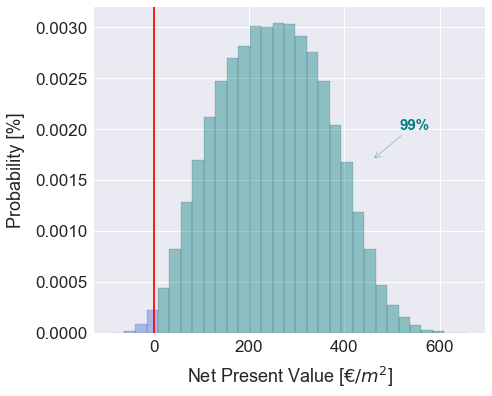

In [24]:
# sns.set_style("darkgrid")

# plt parameters
plt.figure(figsize=(7,6))
plt.rcParams['figure.figsize'] = (11.0, 9.0)
plt.style.use('seaborn')
plt.rcParams['axes.grid'] = True
plt.rcParams["patch.force_edgecolor"] = True

# specify data
outcomes_data = outcomes["npv"]

# plot a histogram of the NPVs
ax = sns.distplot(outcomes_data, color = "royalblue", kde=False, norm_hist = True, bins=31)
ax.set_xlabel("Net Present Value [$€/m^2$]",fontsize=18, labelpad=10)
ax.set_ylabel("Probability [%]",fontsize=18, labelpad=10)
ax.tick_params(axis='x', which='major', labelsize=17)
ax.tick_params(axis='y', which='major', labelsize=17)

# set y limits
ax.set_ylim(0, 0.0032)

# add the vertical line
line_position = 0
plt.vlines(line_position, 0, 0.004, color='r', label='', colors="r")

# color bars greater than mean_diff except the partial bar
for rectangle in ax.patches:
    if rectangle.get_x() >= line_position:
        rectangle.set_facecolor('teal')
        
# add the annotation
indices_values_above_0 = np.where(outcomes_data >0, True, False)
positive_npvs_prob = int( len(outcomes_data[indices_values_above_0])/len(outcomes_data) *100)
plt.annotate(str(positive_npvs_prob)+"%", xy=(460, 0.0017), weight='bold', color='teal',
             xytext=(515, 0.002), fontsize=15, arrowprops=dict(arrowstyle="->", color='teal'))
        
# Save the plot
plt.savefig("Figures/social CBA net present values", dpi=300, bbox_inches = "tight")

In [25]:
print(" minimum value: "+ str(np.min(outcomes_data)) + 
      "\n median value: " + str(np.median(outcomes_data)) +
      "\n maximum value: " + str(np.max(outcomes_data)) )

 minimum value: -87.34851634866993
 median value: 250.62305643371008
 maximum value: 658.3331188136427


## 3.1 Including only private items

C:\Users\frac1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


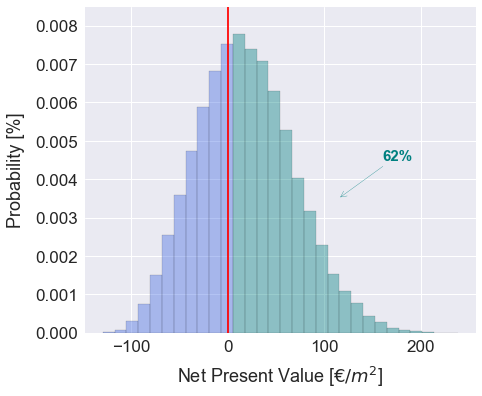

In [26]:
# sns.set_style("darkgrid")

# plt parameters
plt.figure(figsize=(7,6))
plt.rcParams['figure.figsize'] = (11.0, 9.0)
plt.style.use('seaborn')
plt.rcParams['axes.grid'] = True
plt.rcParams["patch.force_edgecolor"] = True

# specify data
outcomes_data = outcomes_private["npv"]

# plot a histogram of the NPVs
ax2 = sns.distplot(outcomes_data, 
                   color = "royalblue", 
                   kde=False,
                   norm_hist = True,
                   bins=30)
ax2.set_xlabel("Net Present Value [$€/m^2$]",fontsize=18, labelpad=10)
ax2.set_ylabel("Probability [%]",fontsize=18, labelpad=10)
ax2.tick_params(axis='x', which='major', labelsize=17)
ax2.tick_params(axis='y', which='major', labelsize=17)

# set y limits
ax2.set_ylim(0, 0.0085)

# add the vertical line
line_position = 0
plt.vlines(line_position, 0, 0.01, color='r', label='', colors="r")

# color bars greater than mean_diff except the partial bar
for rectangle in ax2.patches:
    if rectangle.get_x() >= line_position:
        rectangle.set_facecolor('teal')
        
# add the annotation
indices_values_above_0 = np.where(outcomes_data >=0, True, False)
positive_npvs_prob = int( len(outcomes_data[indices_values_above_0])/len(outcomes_data) *100)
plt.annotate(str(positive_npvs_prob)+"%", xy=(115, 0.0035), weight='bold', color='teal',
             xytext=(160, 0.0045), fontsize=15, arrowprops=dict(arrowstyle="->", color='teal'))
        
# Save the plot
plt.savefig("Figures/Private CBA net present values", dpi=300, bbox_inches = "tight");

In [27]:
print(" minimum value: "+ str(np.min(outcomes_private["npv"])) + 
      "\n median value: " + str(np.median(outcomes_private["npv"])) +
      "\n maximum value: " + str(np.max(outcomes_private["npv"])) )

 minimum value: -129.75258993289836
 median value: 16.397495659851277
 maximum value: 238.5359289375046


## 3.1 Including public items

C:\Users\frac1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


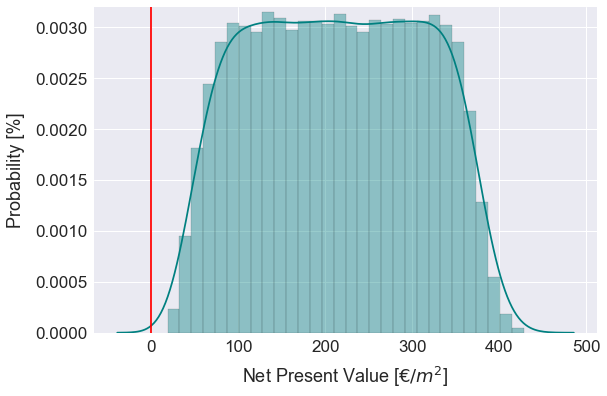

In [29]:
# sns.set_style("darkgrid")

# plt parameters
plt.figure(figsize=(9,6))
plt.rcParams['figure.figsize'] = (11.0, 9.0)
plt.style.use('seaborn')
plt.rcParams['axes.grid'] = True
plt.rcParams["patch.force_edgecolor"] = True

# specify data
outcomes_data = outcomes_public["npv"]

# plot a histogram of the NPVs
ax3 = sns.distplot(outcomes_data, 
                   color = "royalblue", 
                   kde=True, kde_kws={"bw_adjust":2, "color":"teal"},
                   norm_hist = True, bins =30)
ax3.set_xlabel("Net Present Value [$€/m^2$]",fontsize=18, labelpad=10)
ax3.set_ylabel("Probability [%]",fontsize=18, labelpad=10)
ax3.tick_params(axis='x', which='major', labelsize=17)
ax3.tick_params(axis='y', which='major', labelsize=17)

# set y limits
ax3.set_ylim(0, 0.0032)

# add the vertical line
line_position = 0
plt.vlines(line_position, 0, 0.004, color='r', label='', colors="r")

# color bars greater than mean_diff except the partial bar
for rectangle in ax3.patches:
    if rectangle.get_x() >= line_position:
        rectangle.set_facecolor('teal')
        rectangle.get_x
        
# add the annotation
indices_values_above_0 = np.where(outcomes_data >=0, True, False)
positive_npvs_prob = int( len(outcomes_data[indices_values_above_0])/len(outcomes_data) *100)
plt.annotate(str(positive_npvs_prob)+"%", xy=(5500, 0.0001), weight='bold', color='teal',
             xytext=(6000, 0.00013), fontsize=15, arrowprops=dict(arrowstyle="->", color='teal'))
        
# Save the plot
plt.savefig("Figures/Public CBA net present values", dpi=300, bbox_inches = "tight")

In [30]:
print(" minimum value: "+ str(np.min(outcomes_public["npv"])) + 
      "\n median value: " + str(np.median(outcomes_public["npv"])) +
      "\n maximum value: " + str(np.max(outcomes_public["npv"])) )

 minimum value: 18.480668970435445
 median value: 213.95644202790828
 maximum value: 428.1088061641732


# 4. Scenario Discovery

It is carried out only considering private items

In [31]:
x = experiments_private
y = outcomes_private["npv"] > 0

prim_alg = prim.Prim(x,y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 100000 points remaining, containing 62659 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.122, coverage: 0.19470467131617167, density: 1.0 restricted_dimensions: 4


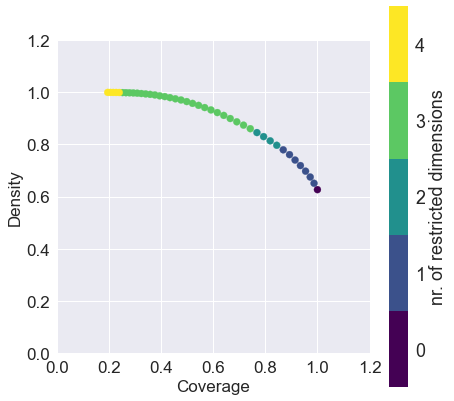

In [32]:
sns.set_style("darkgrid")
box1.show_tradeoff(figure_size=(7,7), xy_label_size=17, colorbar_label_size=18)
n_scenarios = 100000
plt.savefig("Figures/PRIM Scenario Discovery"+" - "+str(n_scenarios)+" - pealing trajectory", bbox_inches = "tight")
plt.show()

In [33]:
# Choose a density of at least 80%, while maximizing the coverage

box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.626590,0,1.00000,0.626590,0
1,0.987025,0.651011,1,0.95000,0.651011,1
2,0.972279,0.675036,2,0.90250,0.675036,1
3,0.954452,0.697540,3,0.85737,0.697540,1
4,0.934726,0.719079,4,0.81450,0.719079,1
5,0.914138,0.740259,5,0.77377,0.740259,1
6,0.892833,0.761060,6,0.73508,0.761060,1
7,0.868734,0.779499,7,0.69832,0.779499,1
8,0.843773,0.796955,8,0.66340,0.796955,2
9,0.818701,0.813973,9,0.63023,0.813973,2


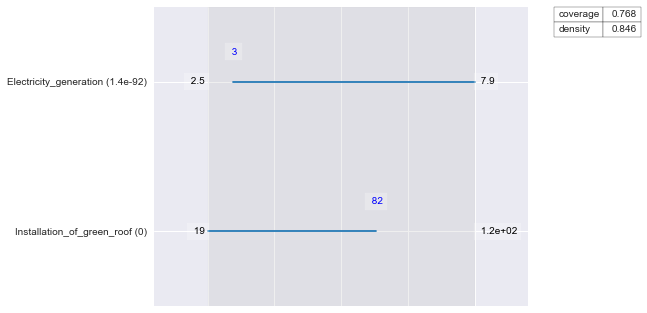

In [61]:
fig = box1.inspect(11,style='graph')

plt.savefig("Figures/PRIM Scenario Discovery"+" - "+str(n_scenarios)+" - dimensions restricted", bbox_inches = "tight")
# plt.show()

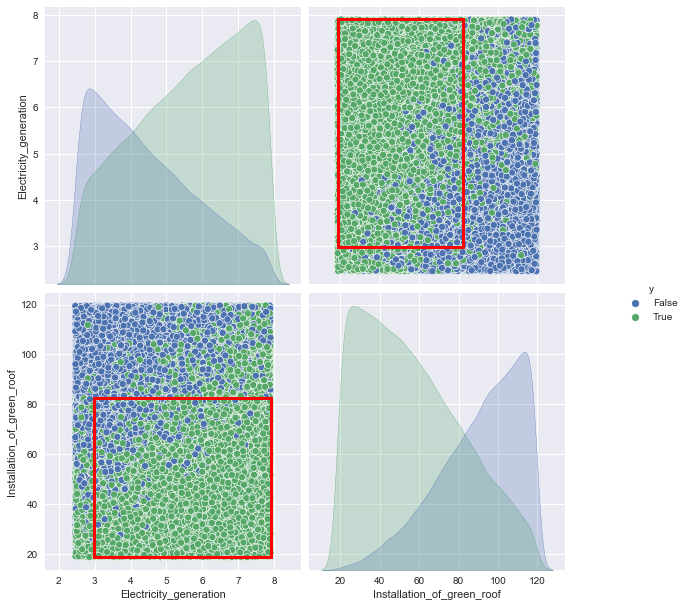

In [62]:
box1.show_pairs_scatter(11).fig.set_size_inches(10,9)
plt.savefig("Figures/PRIM Scenario Discovery"+"_"+str(n_scenarios)+" - box", bbox_inches = "tight")
plt.show()

# 5 Exploration of alternative situations

## 5.1. CBA with incentive

#### 5.1.1. Definition of CBA model with incentive

In [36]:
# define CBA model as a function

def cba_with_incentive(time_horizon = 40, r = 0.04,
        Incentive = 0,
        Aesthetics_increase = 0, Air_quality_enhancement= 0, Biodiversity_enhancement= 0, CO2_emission_reduction= 0, CO2_uptake= 0, 
        Energy_consumption_reduction= 0, Electricity_generation = 0, Longevity_increase= 0, 
        Sound_insulation= 0, Stormwater_management= 0, Water_runoff_quality_increase= 0,
        Installation_of_green_roof= 0, Maintenance_of_green_roof= 0, Installation_of_PV_panels = 0, Maintenance_of_PV_panels = 0):
    """This function defines the cost-benefit analysis model for photovoltaic-green roofs"""
    
    # initialize the net present value (i.e., the summation) and an auxiliary variable
    npv = 0
    aux = 0
    
    # perform the summation (i.e., sum the summation arguments)
    for t in range(0,time_horizon):
        
        #define the sum of all benefits, which are all yearly values
        benefits_sum = np.sum([Air_quality_enhancement, Biodiversity_enhancement, CO2_emission_reduction, CO2_uptake,
                               Energy_consumption_reduction, Longevity_increase, 
                               Sound_insulation, Stormwater_management, Water_runoff_quality_increase, Electricity_generation])
        #define the sum of all benefits execept that related to photovoltaic panels 
        benefits_sum_no_pvs = np.sum([Air_quality_enhancement, Biodiversity_enhancement, CO2_emission_reduction, CO2_uptake,
                               Energy_consumption_reduction, Longevity_increase, 
                               Sound_insulation, Stormwater_management, Water_runoff_quality_increase])
        
        if t == 0:         
            #compute the summation argument of year 0
            summation_argument = ( Incentive + Aesthetics_increase - Installation_of_PV_panels - Installation_of_green_roof) / (1 + r)**t
            
        elif t == 19:
            #compute the summation argument of the operative year when PV panels need to be re-installed (i.e, year 20)
            summation_argument = (benefits_sum_no_pvs - Maintenance_of_green_roof - Installation_of_PV_panels) / (1 + r)**t
            
        elif (t == time_horizon-1):    
            #compute the summation argument of the last year of operative life
            summation_argument = (-Installation_of_PV_panels - Installation_of_green_roof) / (1 + r)**t   
        
        else:
            #compute the summation argument of each year of operative and active life, other than the ones mentioned above
            summation_argument = (benefits_sum - Maintenance_of_green_roof - Maintenance_of_PV_panels) / (1 + r)**t
            
        #sum the summation argument with the total, already summed, value of the previous iteration (i.e., the previous year)
        npv += summation_argument
        
    return npv, aux

#### 5.1.2. Simulation of private CBA with low incentive

In [37]:
summary_costs = local_costs.groupby('Item')["Adjusted Monetary value [EU27 2020 €/m2]"].agg([minimum, q1, median, q3, maximum])

# Replace the spaces in the row indexes' names (i.e., the benefits' names) with an underscore, and delete parentheses,
# so to be able to use the benefit names as variables in the CBA Model
summary_costs.index = summary_costs.index.str.replace("(", "")
summary_costs.index = summary_costs.index.str.replace(")", "")
summary_costs.index = summary_costs.index.str.replace(" net", "")
summary_costs.index = summary_costs.index.str.replace(" ","_")


# do it again for benefits
summary_benefits = local_benefits.groupby('Item').agg([minimum, q1, 'median', q3, maximum])

summary_benefits.columns = summary_benefits.columns.droplevel()
summary_benefits.index = summary_benefits.index.str.replace("(", "")
summary_benefits.index = summary_benefits.index.str.replace(")", "")
summary_benefits.index = summary_benefits.index.str.replace(" heating and cooling", "")
summary_benefits.index = summary_benefits.index.str.replace(" ","_")

summary_benefits_with_incentive = summary_benefits
summary_costs_with_incentive = summary_costs

# Corrections to data:
# due to the lower number of observations (n=1)
summary_benefits_with_incentive.loc["Aesthetics_increase", ["minimum", "q1", "median", "q3"]] = [0.00, ((0.00 + 328.339910)/2 + 0)/2, (0.00 + 328.339910)/2, ((0.00 + 328.339910)/2 + 328.339910)/2 ]
# due to the alternative method to calculate the quantile (excluding the median):
summary_benefits_with_incentive.loc["Electricity_generation", "maximum"] = 7.905312691

# Do not consider fire risk reduction, urban heat island mitigation, since such recorded benefits are equal to zero 
# in the local analysis' case-studies
# Do not consider biodiversity enhancement here, as there is just one value, and it will be considered as a constant
# in the CBA model
summary_benefits_with_incentive.drop([summary_benefits_with_incentive.index[11], 
                                                   summary_benefits_with_incentive.index[7], 
                                                   summary_benefits_with_incentive.index[2]], inplace=True)

# Classify benefits based on the perspective
summary_benefits_with_incentive.insert(5, "perspective", 
                        ["non-private",
                         "non-private",
                         "non-private",
                         "non-private",
                         "private",
                         "private",
                         "private",
                         "non-private",
                         "non-private",
                         "non-private",])

# Display costs and benefits
display(summary_costs_with_incentive)
display(summary_benefits_with_incentive)

# just keep private benefits
summary_benefits_with_incentive = summary_benefits_with_incentive[summary_benefits_with_incentive["perspective"]=="private"]

# specify the EMA workbench's wrapper around the CBA model function, so as to perform 
# exploratory modelling within it



###### instantiate the model ######
cba_model = Model('CbaWithIncentive', function=cba_with_incentive)
cba_model.time_horizon = 40



######  specify uncertainties ######

uncertainties_list = []

#add benefit variables 
for benefit_name in summary_benefits_with_incentive.index:
    
    #get benefit's min value
    benefit_min = summary_benefits_with_incentive.loc[benefit_name,"minimum"]
    
    #get benefit's max value
    benefit_max = summary_benefits_with_incentive.loc[benefit_name,"maximum"]
    
    # add the benefit variable with its name, min, and max values in the uncertainties list
    uncertainties_list.append( RealParameter(benefit_name, benefit_min, benefit_max) )
    
#add cost variables 
for cost_name in summary_costs_with_incentive.index:
    
    #get benefit's min value
    cost_min = summary_costs_with_incentive.loc[cost_name,"minimum"]
    
    #get benefit's max value
    cost_max = summary_costs_with_incentive.loc[cost_name,"maximum"]
    
    # add the cost variable with its name, min, and max values in the uncertainties list
    uncertainties_list.append( RealParameter(cost_name, cost_min, cost_max) )
    
# add private discount rate
uncertainties_list.append( RealParameter("r", 0.03, 0.09) )

# set the uncertainties list just created as the EMA Workbench "uncertainties wrapper"
cba_model.uncertainties = uncertainties_list
                   
#specify constants
cba_model.constants = [Constant('Biodiversity_enhancement', 0.154169)]
cba_model.constants = [Constant('Incentive', 26.2715)]
        
        
######  specify the outcome ######

cba_model.outcomes = [ScalarOutcome('npv')]
# cba_model.outcomes = [ScalarOutcome('npv'), ScalarOutcome("aux")]

C:\Users\frac1\AppData\Local\Temp/ipykernel_28656/436291365.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  summary_costs.index = summary_costs.index.str.replace("(", "")
C:\Users\frac1\AppData\Local\Temp/ipykernel_28656/436291365.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  summary_costs.index = summary_costs.index.str.replace(")", "")
C:\Users\frac1\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)

,minimum,q1,median,q3,maximum
Item,,,,,
Installation_of_PV_panels,8.969562,14.545548,14.828348,21.147541,23.434589
Installation_of_green_roof,18.605990,34.841625,87.029538,95.735077,119.668846
Maintenance_of_PV_panels,0.179391,0.290911,0.296567,0.422951,0.468692
Maintenance_of_green_roof,0.037622,0.300321,0.470845,1.016934,1.085364


,minimum,q1,median,q3,maximum,perspective
Item,,,,,,
Aesthetics_increase,0.000000,82.084977,164.169955,246.254932,328.339910,non-private
Air_quality_enhancement,0.012625,0.030853,0.203278,0.499919,0.499919,non-private
CO2_emission_reduction,0.020363,0.030545,0.030545,0.082471,0.082471,non-private
CO2_uptake,0.002848,0.003410,0.003129,0.003410,0.003410,non-private
Electricity_generation,2.459590,4.103584,5.444692,5.485327,7.905313,private
Energy_consumption_reduction,0.078595,0.291459,0.391402,0.510747,0.603092,private
Longevity_increase,0.828746,2.307143,5.734520,5.734520,5.734520,private
Sound_insulation,0.277959,0.292214,0.299341,0.635087,0.635087,non-private
Stormwater_management,0.096726,0.106907,0.893785,1.468943,2.679685,non-private


In [38]:
######    perform experiments    #######
# generation of experiments (scenario-policy couples) including private items only
# generation of scenarios whose values will be sampled
n_scenarios = 100000

with SequentialEvaluator(cba_model) as evaluator:
    experiments_private_PGEC_with_low_incentive, outcomes_private_PGEC_with_low_incentive = evaluator.perform_experiments(n_scenarios)

# save the experiments generated, to directly load it in the future
experiments_private_PGEC_with_low_incentive.to_csv("experiments of private CBA with low incentive.csv",index=False)

# save the outcomes generated, to directly load it in the future
outcomes_private_PGEC_with_low_incentive_file = open("outcomes of private CBA with low incentive.txt", "wb")
pickle.dump(outcomes_private_PGEC_with_low_incentive, outcomes_private_PGEC_with_low_incentive_file)
outcomes_private_PGEC_with_low_incentive_file.close()

# load the saved experiments
experiments_private_PGEC_with_low_incentive = pd.read_csv("experiments of private CBA with low incentive.csv")

# load the saved outcomes 
outcomes_private_PGEC_with_low_incentive_file = open("outcomes of private CBA with low incentive.txt", "rb")
outcomes_private_PGEC_with_low_incentive = pickle.load(outcomes_private_PGEC_with_low_incentive_file)
outcomes_private_PGEC_with_low_incentive_file.close()

[MainProcess/INFO] performing 100000 scenarios * 1 policies * 1 model(s) = 100000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] 20000 cases completed
[MainProcess/INFO] 30000 cases completed
[MainProcess/INFO] 40000 cases completed
[MainProcess/INFO] 50000 cases completed
[MainProcess/INFO] 60000 cases completed
[MainProcess/INFO] 70000 cases completed
[MainProcess/INFO] 80000 cases completed
[MainProcess/INFO] 90000 cases completed
[MainProcess/INFO] 100000 cases completed
[MainProcess/INFO] experiments finished


C:\Users\frac1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


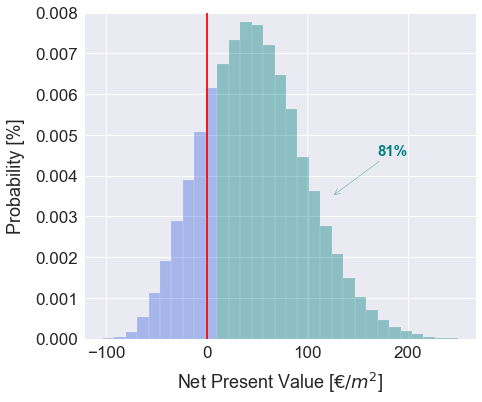

In [60]:
#########    Visualization    ##########

# plt parameters
plt.figure(figsize=(7,6))
plt.rcParams['figure.figsize'] = (11.0, 9.0)
plt.style.use('seaborn')
plt.rcParams['axes.grid'] = True
plt.rcParams["patch.force_edgecolor"] = True

# specify data
outcomes_data = outcomes_private_PGEC_with_low_incentive["npv"]

# plot a histogram of the NPVs
ax2 = sns.distplot(outcomes_data, 
                   color = "royalblue", 
                   kde=False,
                   norm_hist = True,
                   bins=31)
ax2.set_xlabel("Net Present Value [$€/m^2$]",fontsize=18, labelpad=10)
ax2.set_ylabel("Probability [%]",fontsize=18, labelpad=10)
ax2.tick_params(axis='x', which='major', labelsize=17)
ax2.tick_params(axis='y', which='major', labelsize=17)

# set y limits
ax2.set_ylim(0, 0.008)

# add the vertical line
line_position = 0
plt.vlines(line_position, 0, 0.01, color='r', label='', colors="r")

# color bars greater than mean_diff except the partial bar
for rectangle in ax2.patches:
    if rectangle.get_x() >= line_position:
        rectangle.set_facecolor('teal')
        
# add the annotation
indices_values_above_0 = np.where(outcomes_data >=0, True, False)
positive_npvs_prob = int( len(outcomes_data[indices_values_above_0])/len(outcomes_data) *100)
plt.annotate(str(positive_npvs_prob)+"%", xy=(125, 0.0035), weight='bold', color='teal',
             xytext=(170, 0.0045), fontsize=15, arrowprops=dict(arrowstyle="->", color='teal'))
        
# Save the plot (NB: \/:*?"<>| are characters that cannot be put in the name of plt.savefig() function. If you put one of these, 
# however, the associated error will be: path not found)
plt.savefig("Figures/Private CBA (for PGEC with high incentive) net present values", dpi=300, bbox_inches = "tight");

#### 5.1.3. Simulation of private CBA with high incentive

In [40]:
summary_costs = local_costs.groupby('Item')["Adjusted Monetary value [EU27 2020 €/m2]"].agg([minimum, q1, median, q3, maximum])

# Replace the spaces in the row indexes' names (i.e., the benefits' names) with an underscore, and delete parentheses,
# so to be able to use the benefit names as variables in the CBA Model
summary_costs.index = summary_costs.index.str.replace("(", "")
summary_costs.index = summary_costs.index.str.replace(")", "")
summary_costs.index = summary_costs.index.str.replace(" net", "")
summary_costs.index = summary_costs.index.str.replace(" ","_")


# do it again for benefits
summary_benefits = local_benefits.groupby('Item').agg([minimum, q1, 'median', q3, maximum])

summary_benefits.columns = summary_benefits.columns.droplevel()
summary_benefits.index = summary_benefits.index.str.replace("(", "")
summary_benefits.index = summary_benefits.index.str.replace(")", "")
summary_benefits.index = summary_benefits.index.str.replace(" heating and cooling", "")
summary_benefits.index = summary_benefits.index.str.replace(" ","_")

summary_benefits_with_incentive = summary_benefits
summary_costs_with_incentive = summary_costs

# Corrections to data:
# due to the lower number of observations (n=1)
summary_benefits_with_incentive.loc["Aesthetics_increase", ["minimum", "q1", "median", "q3"]] = [0.00, ((0.00 + 328.339910)/2 + 0)/2, (0.00 + 328.339910)/2, ((0.00 + 328.339910)/2 + 328.339910)/2 ]
# due to the alternative method to calculate the quantile (excluding the median):
summary_benefits_with_incentive.loc["Electricity_generation", "maximum"] = 7.905312691

# Do not consider fire risk reduction, urban heat island mitigation, since such recorded benefits are equal to zero 
# in the local analysis' case-studies
# Do not consider biodiversity enhancement here, as there is just one value, and it will be considered as a constant
# in the CBA model
summary_benefits_with_incentive.drop([summary_benefits_with_incentive.index[11], 
                                                   summary_benefits_with_incentive.index[7], 
                                                   summary_benefits_with_incentive.index[2]], inplace=True)

# Classify benefits based on the perspective
summary_benefits_with_incentive.insert(5, "perspective", 
                        ["non-private",
                         "non-private",
                         "non-private",
                         "non-private",
                         "private",
                         "private",
                         "private",
                         "non-private",
                         "non-private",
                         "non-private",])

# Display costs and benefits
display(summary_costs_with_incentive)
display(summary_benefits_with_incentive)

# just keep private benefits
summary_benefits_with_incentive = summary_benefits_with_incentive[summary_benefits_with_incentive["perspective"]=="private"]

# specify the EMA workbench's wrapper around the CBA model function, so as to perform 
# exploratory modelling within it



###### instantiate the model ######
cba_model = Model('CbaWithIncentive', function=cba_with_incentive)
cba_model.time_horizon = 40



######  specify uncertainties ######

uncertainties_list = []

#add benefit variables 
for benefit_name in summary_benefits_with_incentive.index:
    
    #get benefit's min value
    benefit_min = summary_benefits_with_incentive.loc[benefit_name,"minimum"]
    
    #get benefit's max value
    benefit_max = summary_benefits_with_incentive.loc[benefit_name,"maximum"]
    
    # add the benefit variable with its name, min, and max values in the uncertainties list
    uncertainties_list.append( RealParameter(benefit_name, benefit_min, benefit_max) )
    
#add cost variables 
for cost_name in summary_costs_with_incentive.index:
    
    #get benefit's min value
    cost_min = summary_costs_with_incentive.loc[cost_name,"minimum"]
    
    #get benefit's max value
    cost_max = summary_costs_with_incentive.loc[cost_name,"maximum"]
    
    # add the cost variable with its name, min, and max values in the uncertainties list
    uncertainties_list.append( RealParameter(cost_name, cost_min, cost_max) )
    
# add private discount rate
uncertainties_list.append( RealParameter("r", 0.03, 0.09) )

# set the uncertainties list just created as the EMA Workbench "uncertainties wrapper"
cba_model.uncertainties = uncertainties_list
                   
#specify constants
cba_model.constants = [Constant('Biodiversity_enhancement', 0.154169)]
cba_model.constants = [Constant('Incentive', 85)]
        
        
######  specify the outcome ######

cba_model.outcomes = [ScalarOutcome('npv')]
# cba_model.outcomes = [ScalarOutcome('npv'), ScalarOutcome("aux")]

C:\Users\frac1\AppData\Local\Temp/ipykernel_28656/2324399177.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  summary_costs.index = summary_costs.index.str.replace("(", "")
C:\Users\frac1\AppData\Local\Temp/ipykernel_28656/2324399177.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  summary_costs.index = summary_costs.index.str.replace(")", "")
C:\Users\frac1\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(fun

,minimum,q1,median,q3,maximum
Item,,,,,
Installation_of_PV_panels,8.969562,14.545548,14.828348,21.147541,23.434589
Installation_of_green_roof,18.605990,34.841625,87.029538,95.735077,119.668846
Maintenance_of_PV_panels,0.179391,0.290911,0.296567,0.422951,0.468692
Maintenance_of_green_roof,0.037622,0.300321,0.470845,1.016934,1.085364


,minimum,q1,median,q3,maximum,perspective
Item,,,,,,
Aesthetics_increase,0.000000,82.084977,164.169955,246.254932,328.339910,non-private
Air_quality_enhancement,0.012625,0.030853,0.203278,0.499919,0.499919,non-private
CO2_emission_reduction,0.020363,0.030545,0.030545,0.082471,0.082471,non-private
CO2_uptake,0.002848,0.003410,0.003129,0.003410,0.003410,non-private
Electricity_generation,2.459590,4.103584,5.444692,5.485327,7.905313,private
Energy_consumption_reduction,0.078595,0.291459,0.391402,0.510747,0.603092,private
Longevity_increase,0.828746,2.307143,5.734520,5.734520,5.734520,private
Sound_insulation,0.277959,0.292214,0.299341,0.635087,0.635087,non-private
Stormwater_management,0.096726,0.106907,0.893785,1.468943,2.679685,non-private


In [41]:
######    perform experiments    #######
# generation of experiments (scenario-policy couples) including private items only
# generation of scenarios whose values will be sampled
n_scenarios = 100000

with SequentialEvaluator(cba_model) as evaluator:
    experiments_private_PGEC_with_high_incentive, outcomes_private_PGEC_with_high_incentive = evaluator.perform_experiments(n_scenarios)

# save the experiments generated, to directly load it in the future
experiments_private_PGEC_with_high_incentive.to_csv("experiments of private CBA with high incentive.csv",index=False)

# save the outcomes generated, to directly load it in the future
outcomes_private_PGEC_with_high_incentive_file = open("outcomes of private CBA with high incentive.txt", "wb")
pickle.dump(outcomes_private_PGEC_with_high_incentive, outcomes_private_PGEC_with_high_incentive_file)
outcomes_private_PGEC_with_high_incentive_file.close()

# load the saved experiments
experiments_private_PGEC_with_high_incentive = pd.read_csv("experiments of private CBA with high incentive.csv")

# load the saved outcomes 
outcomes_private_PGEC_with_high_incentive_file = open("outcomes of private CBA with high incentive.txt", "rb")
outcomes_private_PGEC_with_high_incentive = pickle.load(outcomes_private_PGEC_with_high_incentive_file)
outcomes_private_PGEC_with_high_incentive_file.close()

[MainProcess/INFO] performing 100000 scenarios * 1 policies * 1 model(s) = 100000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] 20000 cases completed
[MainProcess/INFO] 30000 cases completed
[MainProcess/INFO] 40000 cases completed
[MainProcess/INFO] 50000 cases completed
[MainProcess/INFO] 60000 cases completed
[MainProcess/INFO] 70000 cases completed
[MainProcess/INFO] 80000 cases completed
[MainProcess/INFO] 90000 cases completed
[MainProcess/INFO] 100000 cases completed
[MainProcess/INFO] experiments finished


C:\Users\frac1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


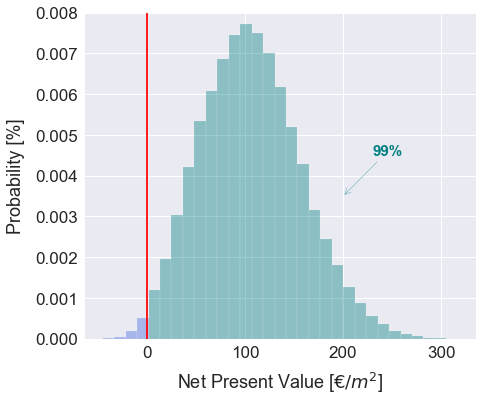

In [56]:
#########    Visualization    ##########

# plt parameters
plt.figure(figsize=(7,6))
plt.rcParams['figure.figsize'] = (11.0, 9.0)
plt.style.use('seaborn')
plt.rcParams['axes.grid'] = True
plt.rcParams["patch.force_edgecolor"] = True

# specify data
outcomes_data = outcomes_private_PGEC_with_high_incentive["npv"]

# plot a histogram of the NPVs
ax2 = sns.distplot(outcomes_data, 
                   color = "royalblue", 
                   kde=False,
                   norm_hist = True,
                   bins=31)
ax2.set_xlabel("Net Present Value [$€/m^2$]",fontsize=18, labelpad=10)
ax2.set_ylabel("Probability [%]",fontsize=18, labelpad=10)
ax2.tick_params(axis='x', which='major', labelsize=17)
ax2.tick_params(axis='y', which='major', labelsize=17)

# set y limits
ax2.set_ylim(0, 0.008)

# add the vertical line
line_position = 0
plt.vlines(line_position, 0, 0.01, color='r', label='', colors="r")

# color bars greater than mean_diff except the partial bar
for rectangle in ax2.patches:
    if rectangle.get_x() >= line_position:
        rectangle.set_facecolor('teal')
        
# add the annotation
indices_values_above_0 = np.where(outcomes_data >=0, True, False)
positive_npvs_prob = int( len(outcomes_data[indices_values_above_0])/len(outcomes_data) *100)
plt.annotate(str(positive_npvs_prob)+"%", xy=(200, 0.0035), weight='bold', color='teal',
             xytext=(230, 0.0045), fontsize=15, arrowprops=dict(arrowstyle="->", color='teal'))
        
# Save the plot (NB: \/:*?"<>| are characters that cannot be put in the name of plt.savefig() function. If you put one of these, 
# however, the associated error will be: path not found)
plt.savefig("Figures/Private CBA (for PGEC with low incentive) net present values", dpi=300, bbox_inches = "tight");

## 5.2. CBA of a small size PGEC: PV installations have an installed capacity <= 10 kW

Concretly, PV installation and maintenance costs for small-size community plants (<= 10 kW)

### 5.2.1. Private CBA

In [43]:
summary_costs = local_costs.groupby('Item')["Adjusted Monetary value [EU27 2020 €/m2]"].agg([minimum, q1, median, q3, maximum])

# Replace the spaces in the row indexes' names (i.e., the benefits' names) with an underscore, and delete parentheses,
# so to be able to use the benefit names as variables in the CBA Model
summary_costs.index = summary_costs.index.str.replace("(", "")
summary_costs.index = summary_costs.index.str.replace(")", "")
summary_costs.index = summary_costs.index.str.replace(" net", "")
summary_costs.index = summary_costs.index.str.replace(" ","_")


# do it again for benefits
summary_benefits = local_benefits.groupby('Item').agg([minimum, q1, 'median', q3, maximum])

summary_benefits.columns = summary_benefits.columns.droplevel()
summary_benefits.index = summary_benefits.index.str.replace("(", "")
summary_benefits.index = summary_benefits.index.str.replace(")", "")
summary_benefits.index = summary_benefits.index.str.replace(" heating and cooling", "")
summary_benefits.index = summary_benefits.index.str.replace(" ","_")

summary_benefits_small_PGEC = summary_benefits
summary_costs_small_PGEC = summary_costs

# Corrections to data:
# due to the lower number of observations (n=1)
summary_benefits_small_PGEC.loc["Aesthetics_increase", ["minimum", "q1", "median", "q3"]] = [0.00, ((0.00 + 328.339910)/2 + 0)/2, (0.00 + 328.339910)/2, ((0.00 + 328.339910)/2 + 328.339910)/2 ]
# due to the alternative method to calculate the quantile (excluding the median):
summary_benefits_small_PGEC.loc["Electricity_generation", "maximum"] = 7.905312691
# due to small scale PGEC and PV installations (<= 10 kW):
summary_costs_small_PGEC.loc["Installation_of_PV_panels", ["minimum","median", "maximum"]] = [25.38, 30.31, 35.25]
summary_costs_small_PGEC.loc["Maintenance_of_PV_panels", ["minimum","median", "maximum"]] = [0.51, 0.61, 0.70]

# Do not consider fire risk reduction, urban heat island mitigation, since such recorded benefits are equal to zero 
# in the local analysis' case-studies
# Do not consider biodiversity enhancement here, as there is just one value, and it will be considered as a constant
# in the CBA model
summary_benefits_small_PGEC.drop([summary_benefits_small_PGEC.index[11], 
                                                   summary_benefits_small_PGEC.index[7], 
                                                   summary_benefits_small_PGEC.index[2]], inplace=True)

# Classify benefits based on the perspective
summary_benefits_small_PGEC.insert(5, "perspective", 
                        ["non-private",
                         "non-private",
                         "non-private",
                         "non-private",
                         "private",
                         "private",
                         "private",
                         "non-private",
                         "non-private",
                         "non-private",])

# Display costs and benefits
display(summary_costs_small_PGEC)
display(summary_benefits_small_PGEC)

# just keep private benefits
summary_benefits_small_PGEC = summary_benefits_small_PGEC[summary_benefits_small_PGEC["perspective"]=="private"]

# specify the EMA workbench's wrapper around the CBA model function, so as to perform 
# exploratory modelling within it



###### instantiate the model ######
cba_model = Model('cba', function=cba)
cba_model.time_horizon = 40



######  specify uncertainties ######

uncertainties_list = []

#add benefit variables 
for benefit_name in summary_benefits_small_PGEC.index:
    
    #get benefit's min value
    benefit_min = summary_benefits_small_PGEC.loc[benefit_name,"minimum"]
    
    #get benefit's max value
    benefit_max = summary_benefits_small_PGEC.loc[benefit_name,"maximum"]
    
    # add the benefit variable with its name, min, and max values in the uncertainties list
    uncertainties_list.append( RealParameter(benefit_name, benefit_min, benefit_max) )
    
#add cost variables 
for cost_name in summary_costs_small_PGEC.index:
    
    #get benefit's min value
    cost_min = summary_costs_small_PGEC.loc[cost_name,"minimum"]
    
    #get benefit's max value
    cost_max = summary_costs_small_PGEC.loc[cost_name,"maximum"]
    
    # add the cost variable with its name, min, and max values in the uncertainties list
    uncertainties_list.append( RealParameter(cost_name, cost_min, cost_max) )
    
# add private discount rate
uncertainties_list.append( RealParameter("r", 0.03, 0.09) )

# set the uncertainties list just created as the EMA Workbench "uncertainties wrapper"
cba_model.uncertainties = uncertainties_list


#specify constants
cba_model.constants = [Constant('Biodiversity_enhancement', 0.154169)]
                
        
######  specify the outcome ######

cba_model.outcomes = [ScalarOutcome('npv')]
# cba_model.outcomes = [ScalarOutcome('npv'), ScalarOutcome("aux")]

C:\Users\frac1\AppData\Local\Temp/ipykernel_28656/523621637.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  summary_costs.index = summary_costs.index.str.replace("(", "")
C:\Users\frac1\AppData\Local\Temp/ipykernel_28656/523621637.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  summary_costs.index = summary_costs.index.str.replace(")", "")
C:\Users\frac1\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)

,minimum,q1,median,q3,maximum
Item,,,,,
Installation_of_PV_panels,25.380000,14.545548,30.310000,21.147541,35.250000
Installation_of_green_roof,18.605990,34.841625,87.029538,95.735077,119.668846
Maintenance_of_PV_panels,0.510000,0.290911,0.610000,0.422951,0.700000
Maintenance_of_green_roof,0.037622,0.300321,0.470845,1.016934,1.085364


,minimum,q1,median,q3,maximum,perspective
Item,,,,,,
Aesthetics_increase,0.000000,82.084977,164.169955,246.254932,328.339910,non-private
Air_quality_enhancement,0.012625,0.030853,0.203278,0.499919,0.499919,non-private
CO2_emission_reduction,0.020363,0.030545,0.030545,0.082471,0.082471,non-private
CO2_uptake,0.002848,0.003410,0.003129,0.003410,0.003410,non-private
Electricity_generation,2.459590,4.103584,5.444692,5.485327,7.905313,private
Energy_consumption_reduction,0.078595,0.291459,0.391402,0.510747,0.603092,private
Longevity_increase,0.828746,2.307143,5.734520,5.734520,5.734520,private
Sound_insulation,0.277959,0.292214,0.299341,0.635087,0.635087,non-private
Stormwater_management,0.096726,0.106907,0.893785,1.468943,2.679685,non-private


In [44]:
######    perform experiments    #######

# generation of experiments (scenario-policy couples) including private items only
# generation of scenarios whose values will be sampled
n_scenarios = 100000

with SequentialEvaluator(cba_model) as evaluator:
    experiments_private_small_PGEC, outcomes_private_small_PGEC = evaluator.perform_experiments(n_scenarios)

# save the experiments generated, to directly load it in the future
experiments_private_small_PGEC.to_csv("experiments of private CBA for small PGEC.csv",index=False)

# save the outcomes generated, to directly load it in the future
outcomes_private_small_PGEC_file = open("outcomes of private CBA for small PGEC.txt", "wb")
pickle.dump(outcomes_private_small_PGEC, outcomes_private_small_PGEC_file)
outcomes_private_small_PGEC_file.close()

# load the saved experiments
experiments_private_small_PGEC = pd.read_csv("experiments of private CBA for small PGEC.csv")

# load the saved outcomes 
outcomes_private_small_PGEC_file = open("outcomes of private CBA for small PGEC.txt", "rb")
outcomes_private_small_PGEC = pickle.load(outcomes_private_small_PGEC_file)
outcomes_private_small_PGEC_file.close()

[MainProcess/INFO] performing 100000 scenarios * 1 policies * 1 model(s) = 100000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] 20000 cases completed
[MainProcess/INFO] 30000 cases completed
[MainProcess/INFO] 40000 cases completed
[MainProcess/INFO] 50000 cases completed
[MainProcess/INFO] 60000 cases completed
[MainProcess/INFO] 70000 cases completed
[MainProcess/INFO] 80000 cases completed
[MainProcess/INFO] 90000 cases completed
[MainProcess/INFO] 100000 cases completed
[MainProcess/INFO] experiments finished


C:\Users\frac1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


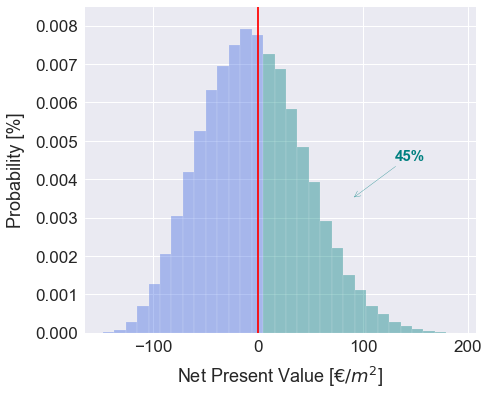

In [59]:
#########    Visualization    ##########

# plt parameters
plt.figure(figsize=(7,6))
plt.rcParams['figure.figsize'] = (11.0, 9.0)
plt.style.use('seaborn')
plt.rcParams['axes.grid'] = True
plt.rcParams["patch.force_edgecolor"] = True

# specify data
outcomes_data = outcomes_private_small_PGEC["npv"]

# plot a histogram of the NPVs
ax2 = sns.distplot(outcomes_data, 
                   color = "royalblue", 
                   kde=False,
                   norm_hist = True,
                   bins=31)
ax2.set_xlabel("Net Present Value [$€/m^2$]",fontsize=18, labelpad=10)
ax2.set_ylabel("Probability [%]",fontsize=18, labelpad=10)
ax2.tick_params(axis='x', which='major', labelsize=17)
ax2.tick_params(axis='y', which='major', labelsize=17)

# set y limits
ax2.set_ylim(0, 0.0085)

# add the vertical line
line_position = 0
plt.vlines(line_position, 0, 0.01, color='r', label='', colors="r")

# color bars greater than mean_diff except the partial bar
for rectangle in ax2.patches:
    if rectangle.get_x() >= line_position:
        rectangle.set_facecolor('teal')
        
# add the annotation
indices_values_above_0 = np.where(outcomes_data >=0, True, False)
positive_npvs_prob = int( len(outcomes_data[indices_values_above_0])/len(outcomes_data) *100)
plt.annotate(str(positive_npvs_prob)+"%", xy=(90, 0.0035), weight='bold', color='teal',
             xytext=(130, 0.0045), fontsize=15, arrowprops=dict(arrowstyle="->", color='teal'))
        
# Save the plot
plt.savefig("Private CBA (for small PGEC) net present values", dpi=300, bbox_inches = "tight");

### 5.2.2 Social CBA

In [47]:
summary_costs = local_costs.groupby('Item')["Adjusted Monetary value [EU27 2020 €/m2]"].agg([minimum, q1, median, q3, maximum])

# Replace the spaces in the row indexes' names (i.e., the benefits' names) with an underscore, and delete parentheses,
# so to be able to use the benefit names as variables in the CBA Model
summary_costs.index = summary_costs.index.str.replace("(", "")
summary_costs.index = summary_costs.index.str.replace(")", "")
summary_costs.index = summary_costs.index.str.replace(" net", "")
summary_costs.index = summary_costs.index.str.replace(" ","_")


# do it again for benefits
summary_benefits = local_benefits.groupby('Item').agg([minimum, q1, 'median', q3, maximum])

summary_benefits.columns = summary_benefits.columns.droplevel()
summary_benefits.index = summary_benefits.index.str.replace("(", "")
summary_benefits.index = summary_benefits.index.str.replace(")", "")
summary_benefits.index = summary_benefits.index.str.replace(" heating and cooling", "")
summary_benefits.index = summary_benefits.index.str.replace(" ","_")

summary_benefits_small_PGEC = summary_benefits
summary_costs_small_PGEC = summary_costs

# Corrections to data:
# due to the lower number of observations (n=1)
summary_benefits_small_PGEC.loc["Aesthetics_increase", ["minimum", "q1", "median", "q3"]] = [0.00, ((0.00 + 328.339910)/2 + 0)/2, (0.00 + 328.339910)/2, ((0.00 + 328.339910)/2 + 328.339910)/2 ]
# due to the alternative method to calculate the quantile (excluding the median):
summary_benefits_small_PGEC.loc["Electricity_generation", "maximum"] = 7.905312691
# due to small scale PGEC and PV installations (<= 10 kW):
summary_costs_small_PGEC.loc["Installation_of_PV_panels", ["minimum","median", "maximum"]] = [25.38, 30.31, 35.25]
summary_costs_small_PGEC.loc["Maintenance_of_PV_panels", ["minimum","median", "maximum"]] = [0.51, 0.61, 0.70]

# Do not consider fire risk reduction, urban heat island mitigation, since such recorded benefits are equal to zero 
# in the local analysis' case-studies
# Do not consider biodiversity enhancement here, as there is just one value, and it will be considered as a constant
# in the CBA model
summary_benefits_small_PGEC.drop([summary_benefits_small_PGEC.index[11], 
                                                   summary_benefits_small_PGEC.index[7], 
                                                   summary_benefits_small_PGEC.index[2]], inplace=True)

# Classify benefits based on the perspective
summary_benefits_small_PGEC.insert(5, "perspective", 
                        ["non-private",
                         "non-private",
                         "non-private",
                         "non-private",
                         "private",
                         "private",
                         "private",
                         "non-private",
                         "non-private",
                         "non-private",])

# Display costs and benefits
display(summary_costs_small_PGEC)
display(summary_benefits_small_PGEC)

# specify the EMA workbench's wrapper around the CBA model function, so as to perform 
# exploratory modelling within it

###### instantiate the model ######
cba_model = Model('cba', function=cba)
cba_model.time_horizon = 40

######  specify uncertainties ######
uncertainties_list = []

#add benefit variables 
for benefit_name in summary_benefits_small_PGEC.index:
    
    #get benefit's min value
    benefit_min = summary_benefits_small_PGEC.loc[benefit_name,"minimum"]
    
    #get benefit's max value
    benefit_max = summary_benefits_small_PGEC.loc[benefit_name,"maximum"]
    
    # add the benefit variable with its name, min, and max values in the uncertainties list
    uncertainties_list.append( RealParameter(benefit_name, benefit_min, benefit_max) )
    
#add cost variables 
for cost_name in summary_costs_small_PGEC.index:
    
    #get benefit's min value
    cost_min = summary_costs_small_PGEC.loc[cost_name,"minimum"]
    
    #get benefit's max value
    cost_max = summary_costs_small_PGEC.loc[cost_name,"maximum"]
    
    # add the cost variable with its name, min, and max values in the uncertainties list
    uncertainties_list.append( RealParameter(cost_name, cost_min, cost_max) )
    
# add social discount rate
uncertainties_list.append( RealParameter("r", 0.02, 0.0667) )

# set the uncertainties list just created as the EMA Workbench "uncertainties wrapper"
cba_model.uncertainties = uncertainties_list
 
#specify constants
cba_model.constants = [Constant('Biodiversity_enhancement', 0.154169)]                
              
######  specify the outcome ######
cba_model.outcomes = [ScalarOutcome('npv')]
# cba_model.outcomes = [ScalarOutcome('npv'), ScalarOutcome("aux")]

C:\Users\frac1\AppData\Local\Temp/ipykernel_28656/1120155686.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  summary_costs.index = summary_costs.index.str.replace("(", "")
C:\Users\frac1\AppData\Local\Temp/ipykernel_28656/1120155686.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  summary_costs.index = summary_costs.index.str.replace(")", "")
C:\Users\frac1\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(fun

,minimum,q1,median,q3,maximum
Item,,,,,
Installation_of_PV_panels,25.380000,14.545548,30.310000,21.147541,35.250000
Installation_of_green_roof,18.605990,34.841625,87.029538,95.735077,119.668846
Maintenance_of_PV_panels,0.510000,0.290911,0.610000,0.422951,0.700000
Maintenance_of_green_roof,0.037622,0.300321,0.470845,1.016934,1.085364


,minimum,q1,median,q3,maximum,perspective
Item,,,,,,
Aesthetics_increase,0.000000,82.084977,164.169955,246.254932,328.339910,non-private
Air_quality_enhancement,0.012625,0.030853,0.203278,0.499919,0.499919,non-private
CO2_emission_reduction,0.020363,0.030545,0.030545,0.082471,0.082471,non-private
CO2_uptake,0.002848,0.003410,0.003129,0.003410,0.003410,non-private
Electricity_generation,2.459590,4.103584,5.444692,5.485327,7.905313,private
Energy_consumption_reduction,0.078595,0.291459,0.391402,0.510747,0.603092,private
Longevity_increase,0.828746,2.307143,5.734520,5.734520,5.734520,private
Sound_insulation,0.277959,0.292214,0.299341,0.635087,0.635087,non-private
Stormwater_management,0.096726,0.106907,0.893785,1.468943,2.679685,non-private


In [48]:
######    perform experiments    #######

# generation of experiments (scenario-policy couples) including all items
# generation of scenarios whose values will be sampled
n_scenarios = 100000

with SequentialEvaluator(cba_model) as evaluator:
    experiments_social_small_PGEC, outcomes_social_small_PGEC = evaluator.perform_experiments(n_scenarios)

# save the experiments generated, to directly load it in the future
experiments_social_small_PGEC.to_csv("experiments of social CBA for small PGEC.csv",index=False)

# save the outcomes generated, to directly load it in the future
outcomes_social_small_PGEC_file = open("outcomes of social CBA for small PGEC.txt", "wb")
pickle.dump(outcomes_social_small_PGEC, outcomes_social_small_PGEC_file)
outcomes_social_small_PGEC_file.close()

# load the saved experiments
experiments_social_small_PGEC = pd.read_csv("experiments of social CBA for small PGEC.csv")

# load the saved outcomes 
outcomes_social_small_PGEC_file = open("outcomes of social CBA for small PGEC.txt", "rb")
outcomes_social_small_PGEC = pickle.load(outcomes_social_small_PGEC_file)
outcomes_social_small_PGEC_file.close()

[MainProcess/INFO] performing 100000 scenarios * 1 policies * 1 model(s) = 100000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] 20000 cases completed
[MainProcess/INFO] 30000 cases completed
[MainProcess/INFO] 40000 cases completed
[MainProcess/INFO] 50000 cases completed
[MainProcess/INFO] 60000 cases completed
[MainProcess/INFO] 70000 cases completed
[MainProcess/INFO] 80000 cases completed
[MainProcess/INFO] 90000 cases completed
[MainProcess/INFO] 100000 cases completed
[MainProcess/INFO] experiments finished


C:\Users\frac1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


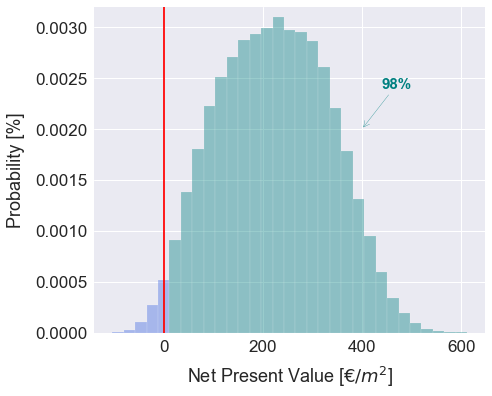

In [53]:
#########    Visualization    ##########

# plt parameters
plt.figure(figsize=(7,6))
plt.rcParams['figure.figsize'] = (11.0, 9.0)
plt.style.use('seaborn')
plt.rcParams['axes.grid'] = True
plt.rcParams["patch.force_edgecolor"] = True

# specify data
outcomes_data = outcomes_social_small_PGEC["npv"]

# plot a histogram of the NPVs
ax2 = sns.distplot(outcomes_data, 
                   color = "royalblue", 
                   kde=False,
                   norm_hist = True,
                   bins=31)
ax2.set_xlabel("Net Present Value [$€/m^2$]",fontsize=18, labelpad=10)
ax2.set_ylabel("Probability [%]",fontsize=18, labelpad=10)
ax2.tick_params(axis='x', which='major', labelsize=17)
ax2.tick_params(axis='y', which='major', labelsize=17)

# set y limits
ax2.set_ylim(0, 0.0032)

# add the vertical line
line_position = 0
plt.vlines(line_position, 0, 0.01, color='r', label='', colors="r")

# color bars greater than mean_diff except the partial bar
for rectangle in ax2.patches:
    if rectangle.get_x() >= line_position:
        rectangle.set_facecolor('teal')
        
# add the annotation
indices_values_above_0 = np.where(outcomes_data >=0, True, False)
positive_npvs_prob = int( len(outcomes_data[indices_values_above_0])/len(outcomes_data) *100)
plt.annotate(str(positive_npvs_prob)+"%", xy=(400, 0.002), weight='bold', color='teal',
             xytext=(440, 0.0024), fontsize=15, arrowprops=dict(arrowstyle="->", color='teal'))
        
# Save the plot
plt.savefig("Social CBA (for small PGEC) net present values", dpi=300, bbox_inches = "tight");